In [1]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow as tf


2023-01-26 00:37:53.008310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 00:37:53.173508: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 00:37:54.706670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/venom/lib/:/usr/local/cuda/lib64::/usr/local/tensorrt/lib/
2023-01-26 00:37:54.70

In [2]:
# Load training data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Print info on the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2023-01-26 00:37:57.450751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 00:37:57.480761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 00:37:57.481077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 00:37:57.483756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 00:37:57.484017: I tensorflow/compiler/xla/stream_executo

In [5]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), validation_batch_size=64, verbose=1)

Epoch 1/5


2023-01-26 00:38:01.554331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-01-26 00:38:02.744020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


938/938 [==============================] - 12s 6ms/step - loss: 0.2918 - accuracy: 0.9334 - val_loss: 0.0773 - val_accuracy: 0.9756
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0539 - val_accuracy: 0.9852


In [8]:
# store predicted lables in a list
import numpy as np
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]


313/313 [==============================] - 0s 1ms/step


In [9]:
# import scoring metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Create dataframe with all the metrics
import pandas as pd
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['Metrics'])
metrics.loc['accuracy'] = accuracy_score(y_test, y_pred)
metrics.loc['precision'] = precision_score(y_test, y_pred, average='weighted')
metrics.loc['recall'] = recall_score(y_test, y_pred, average='weighted')
metrics.loc['f1'] = f1_score(y_test, y_pred, average='weighted')
metrics


,Metrics
accuracy,0.9852
precision,0.985486
recall,0.9852
f1,0.985221


Text(159.0, 0.5, 'Truth')

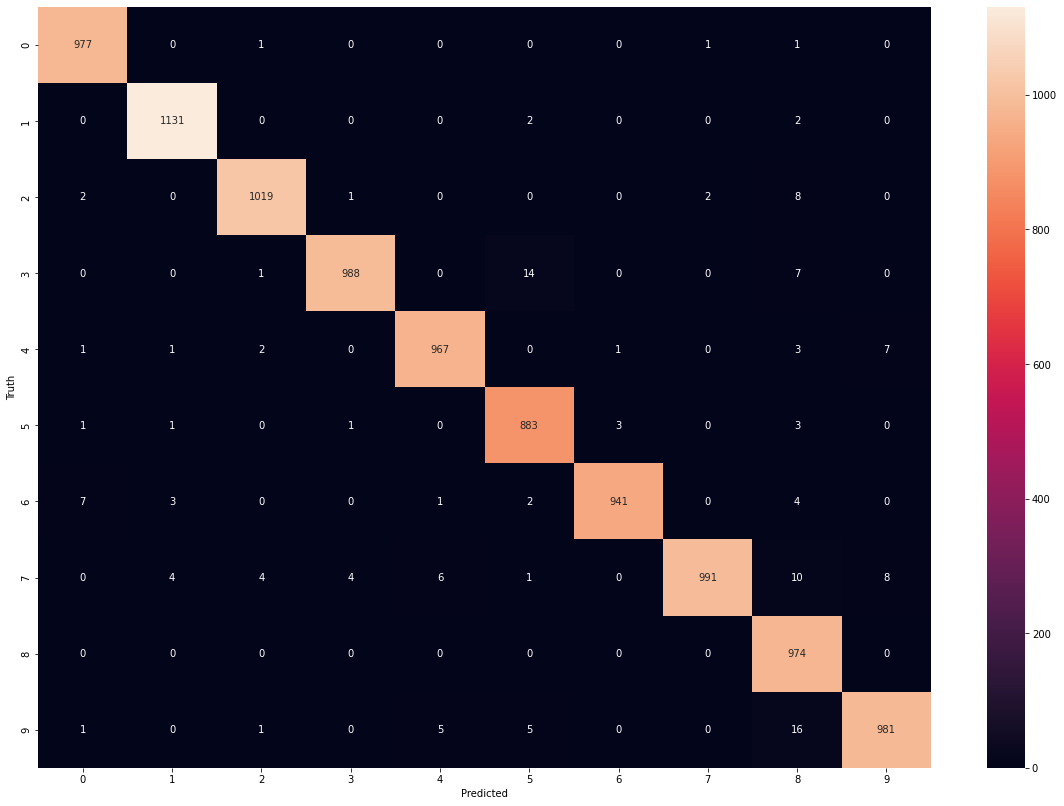

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,14))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# CIFAR-10

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# convert to grayscale
X_train = np.mean(X_train, axis=3)
X_test = np.mean(X_test, axis=3)

In [12]:
# Print info on the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(50000, 32, 32)
(50000, 1)
(10000, 32, 32)
(10000, 1)


In [13]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [14]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), validation_batch_size=64, verbose=1)

Epoch 1/5
782/782 [==============================] - 4s 3ms/step - loss: 1.8247 - accuracy: 0.3756 - val_loss: 1.4321 - val_accuracy: 0.4943
Epoch 2/5
782/782 [==============================] - 2s 3ms/step - loss: 1.3002 - accuracy: 0.5427 - val_loss: 1.2335 - val_accuracy: 0.5780
Epoch 3/5
782/782 [==============================] - 2s 3ms/step - loss: 1.1364 - accuracy: 0.6067 - val_loss: 1.1683 - val_accuracy: 0.5940
Epoch 4/5
782/782 [==============================] - 2s 3ms/step - loss: 1.0125 - accuracy: 0.6491 - val_loss: 1.0890 - val_accuracy: 0.6279
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.9313 - accuracy: 0.6785 - val_loss: 1.0777 - val_accuracy: 0.6336


In [17]:
# store predicted lables in a list
import numpy as np
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]


313/313 [==============================] - 0s 944us/step


In [18]:
metrics = pd.DataFrame(
    index=['accuracy', 'precision', 'recall', 'f1'], columns=['Metrics'])
metrics.loc['accuracy'] = accuracy_score(y_test, y_pred)
metrics.loc['precision'] = precision_score(y_test, y_pred, average='weighted')
metrics.loc['recall'] = recall_score(y_test, y_pred, average='weighted')
metrics.loc['f1'] = f1_score(y_test, y_pred, average='weighted')
metrics


,Metrics
accuracy,0.6336
precision,0.64399
recall,0.6336
f1,0.630866


Text(159.0, 0.5, 'Truth')

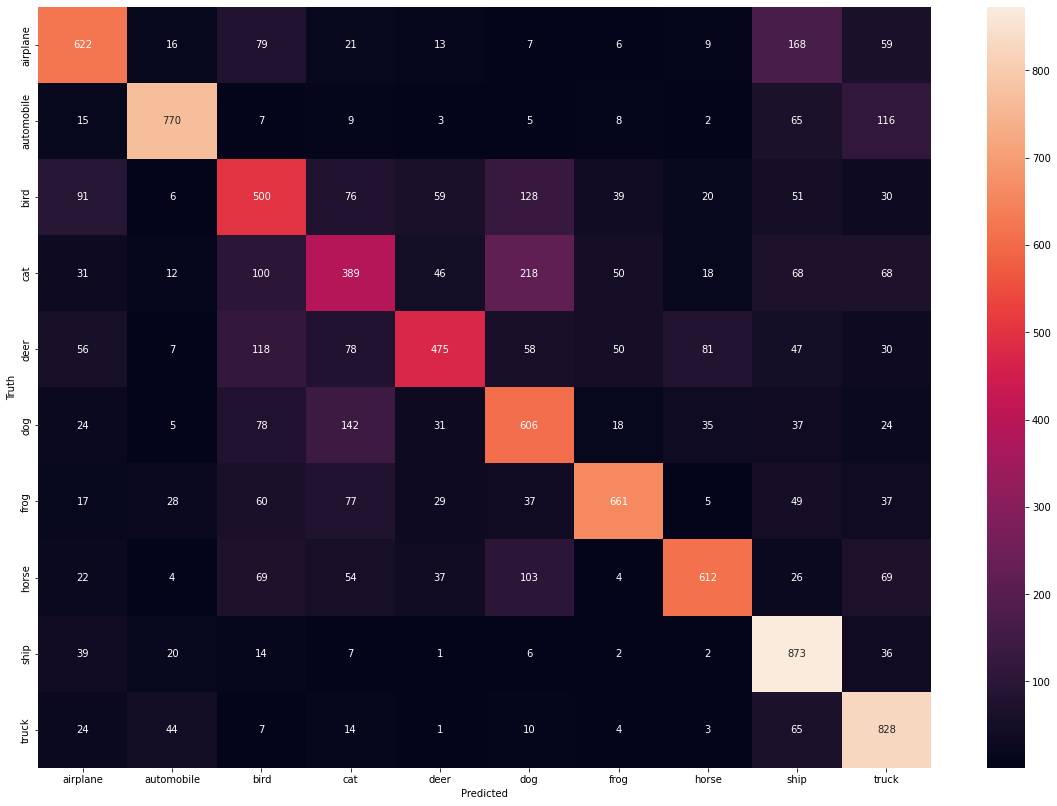

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrix, take classes from cifar10
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], columns=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.figure(figsize=(20,14))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')